In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt

In [12]:
df = pd.read_csv('housing_price_dataset.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']

X = df[features]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print('LinearRegression R2 (test):', lm.score(X_test, y_test))

LinearRegression R2 (test): 0.9179971706834602


In [15]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
print('Lasso R2 (test):', lasso.score(X_test, y_test))

Lasso R2 (test): 0.9179971608478139


In [16]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge R2 (test):', ridge.score(X_test, y_test))

Ridge R2 (test): 0.91799142202412


In [17]:
# GridSearchCV for Lasso
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}
lasso_gs = GridSearchCV(Lasso(max_iter=10000),
                        param_grid=lasso_param_grid,
                        cv=5,
                        scoring='r2',
                        n_jobs=-1)
lasso_gs.fit(X_train, y_train)
print('Best Lasso params:', lasso_gs.best_params_)
print('Best CV R2 (Lasso):', lasso_gs.best_score_)
print('Test R2 (Lasso best estimator):', lasso_gs.best_estimator_.score(X_test, y_test))

Best Lasso params: {'alpha': 10.0}
Best CV R2 (Lasso): 0.9174132017804478
Test R2 (Lasso best estimator): 0.9179961853521253


In [18]:
# GridSearchCV for Ridge
ridge_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}
ridge_gs = GridSearchCV(Ridge(),
                        param_grid=ridge_param_grid,
                        cv=5,
                        scoring='r2',
                        n_jobs=-1)
ridge_gs.fit(X_train, y_train)
print('Best Ridge params:', ridge_gs.best_params_)
print('Best CV R2 (Ridge):', ridge_gs.best_score_)
print('Test R2 (Ridge best estimator):', ridge_gs.best_estimator_.score(X_test, y_test))

Best Ridge params: {'alpha': 1.0}
Best CV R2 (Ridge): 0.9174133082098411
Test R2 (Ridge best estimator): 0.91799142202412


In [21]:
from sklearn.metrics import r2_score

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} R2 (test): {r2:.4f}')
    return y_pred, r2

y_test_pred_lm, r2_lm = evaluate_model('LinearRegression', lm, X_test, y_test)
y_test_pred_lasso, r2_lasso = evaluate_model('Lasso (best)', lasso_gs.best_estimator_, X_test, y_test)
y_test_pred_ridge, r2_ridge = evaluate_model('Ridge (best)', ridge_gs.best_estimator_, X_test, y_test)

LinearRegression R2 (test): 0.9180
Lasso (best) R2 (test): 0.9180
Ridge (best) R2 (test): 0.9180


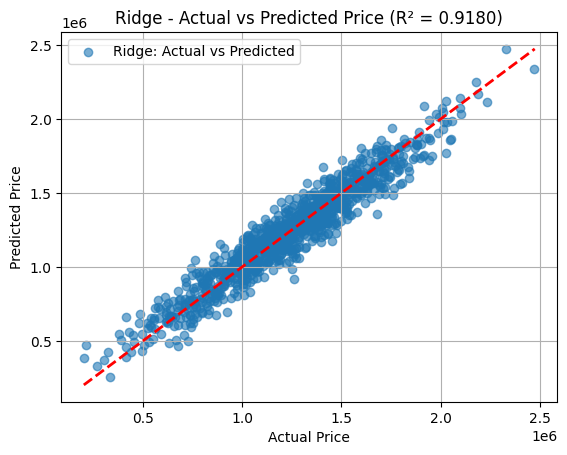

In [22]:
plt.figure()
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, label='Ridge: Actual vs Predicted')
min_val = min(y_test.min(), y_test_pred_ridge.min())
max_val = max(y_test.max(), y_test_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Ridge - Actual vs Predicted Price (R² = {r2_ridge:.4f})')
plt.legend()
plt.grid(True)

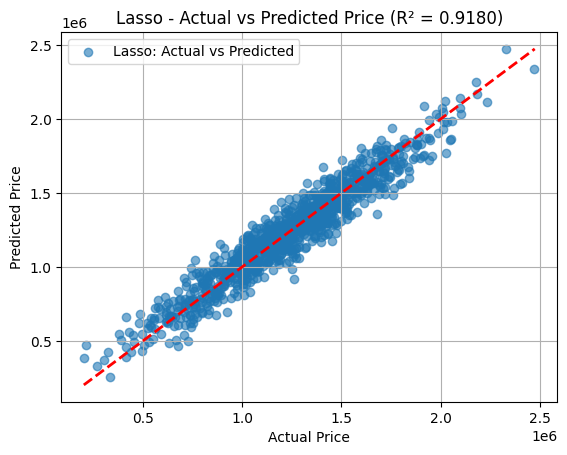

In [23]:
plt.figure()
plt.scatter(y_test, y_test_pred_lasso, alpha=0.6, label='Lasso: Actual vs Predicted')
min_val = min(y_test.min(), y_test_pred_lasso.min())
max_val = max(y_test.max(), y_test_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Lasso - Actual vs Predicted Price (R² = {r2_lasso:.4f})')
plt.legend()
plt.grid(True)